<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 1
### Academic year: 2024-25

## Conduct a security investigation on web traffic from an organisation
---

For this task, the company UWEtech have enlisted your support as a security data analyst. They believe that they have suffered an attack on their network, however they are unable to diagnose what has happened exactly. The company have provided you with an extract of their network traffic, for which you will use visualisation techniques to learn more about the underlying activity on their systems.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/a23-mccarthy/sdav2024

**This exercise carries a weight of 25% towards your overall portfolio submission**

It is strongly encouraged that you use the online reference guides for [Matplotlib](https://matplotlib.org/) and [pandas](https://pandas.pydata.org/) - searching the API documentation will answer many of your questions.


### Submission Documents
---

For Part 1 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART1.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for all portfolio submissions is **THURSDAY 12th DECEMBER @ 14:00**. 

In [5]:
### Load in the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def load_csv_data():
    data = pd.read_csv('./part1/packet-capture3.csv')
    return data

data = load_csv_data()
data = data[ data['Source'].isin(data['Source'].value_counts().head(30).index) ] 
data = data.drop('No.', axis=1)
data

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA..."


---


### Question 1: Plot a Line Chart that clearly depicts "Seconds" on the x-axis, and "Total Number of Packets" sent on the y-axis, complete with axis labeling. 

#### (4 marks)

*Hint: The time is given in seconds with millisecond precision - think how you could aggregate this value to represent seconds only, then research a function that counts the value totals in your data.*

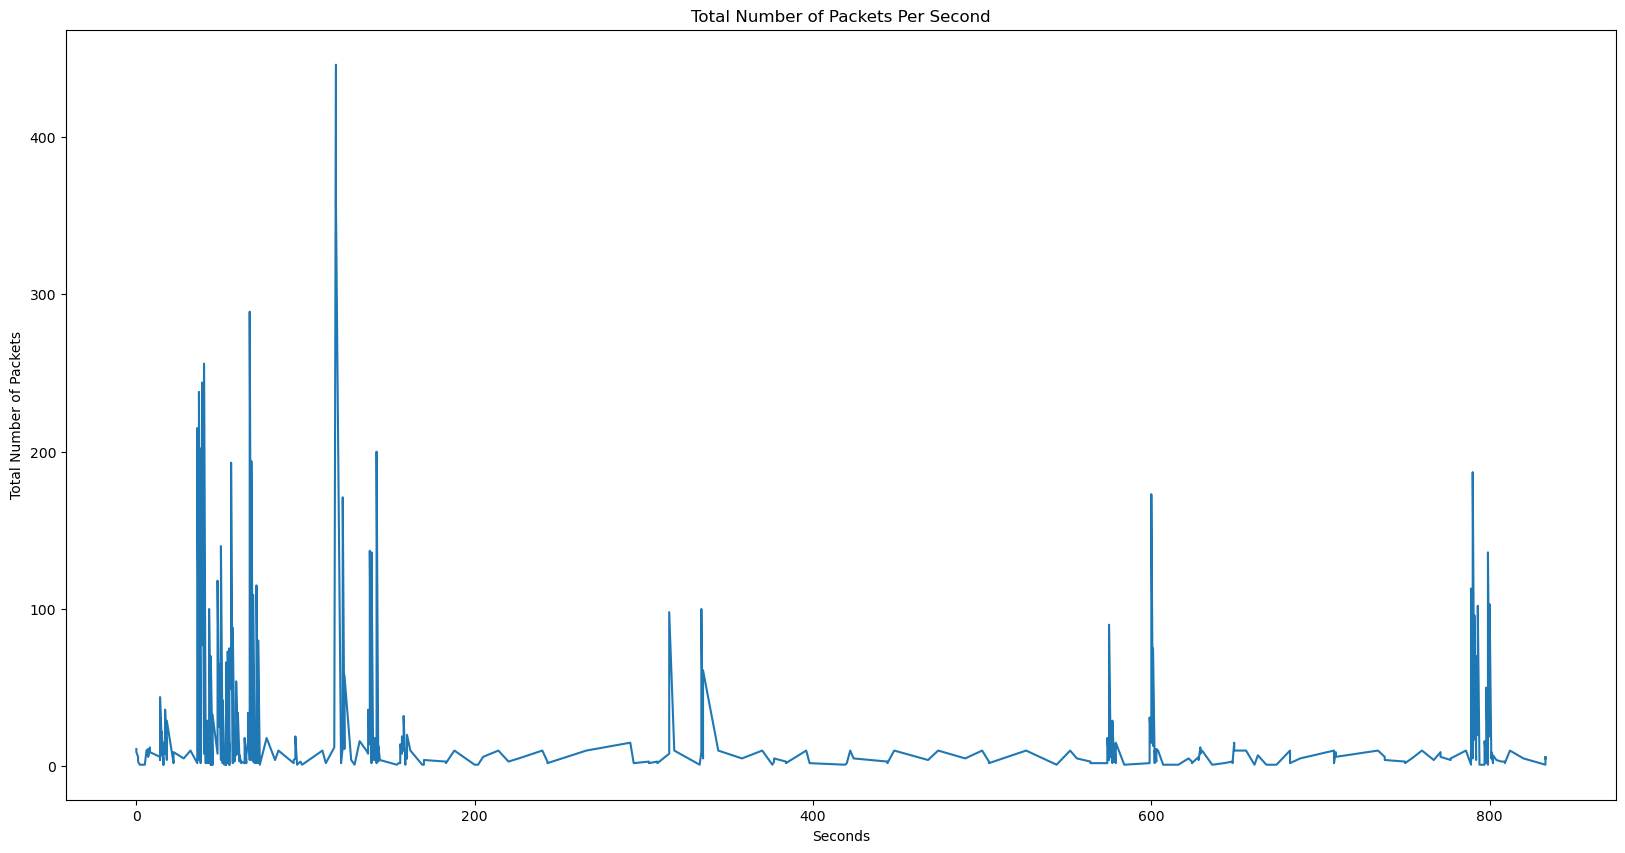

In [8]:
# ANSWER
plt.figure(figsize=(20,10))
######### ADD YOUR CODE HERE ##########
#Get the time in seconds by flooring the miliseconds
data["Seconds"] = data["Time"].apply(lambda x: np.floor(x))
#Get data frame with seconds, protocol and the count for that protocol on that second
groupData = data.groupby(['Seconds', 'Protocol']).size().reset_index(name="Count on Second")

#Plot seconds on X, sum of packets on Y
plt.plot(groupData["Seconds"],groupData["Count on Second"])
plt.title("Total Number of Packets Per Second")
plt.xlabel("Seconds")
plt.ylabel("Total Number of Packets")
plt.show()

Fig 1. Line chart showing the relationship between the frequency of network traffic/packets at each rounded down second.

### Question 2: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis, complete with axis labeling. 
#### (2 marks)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

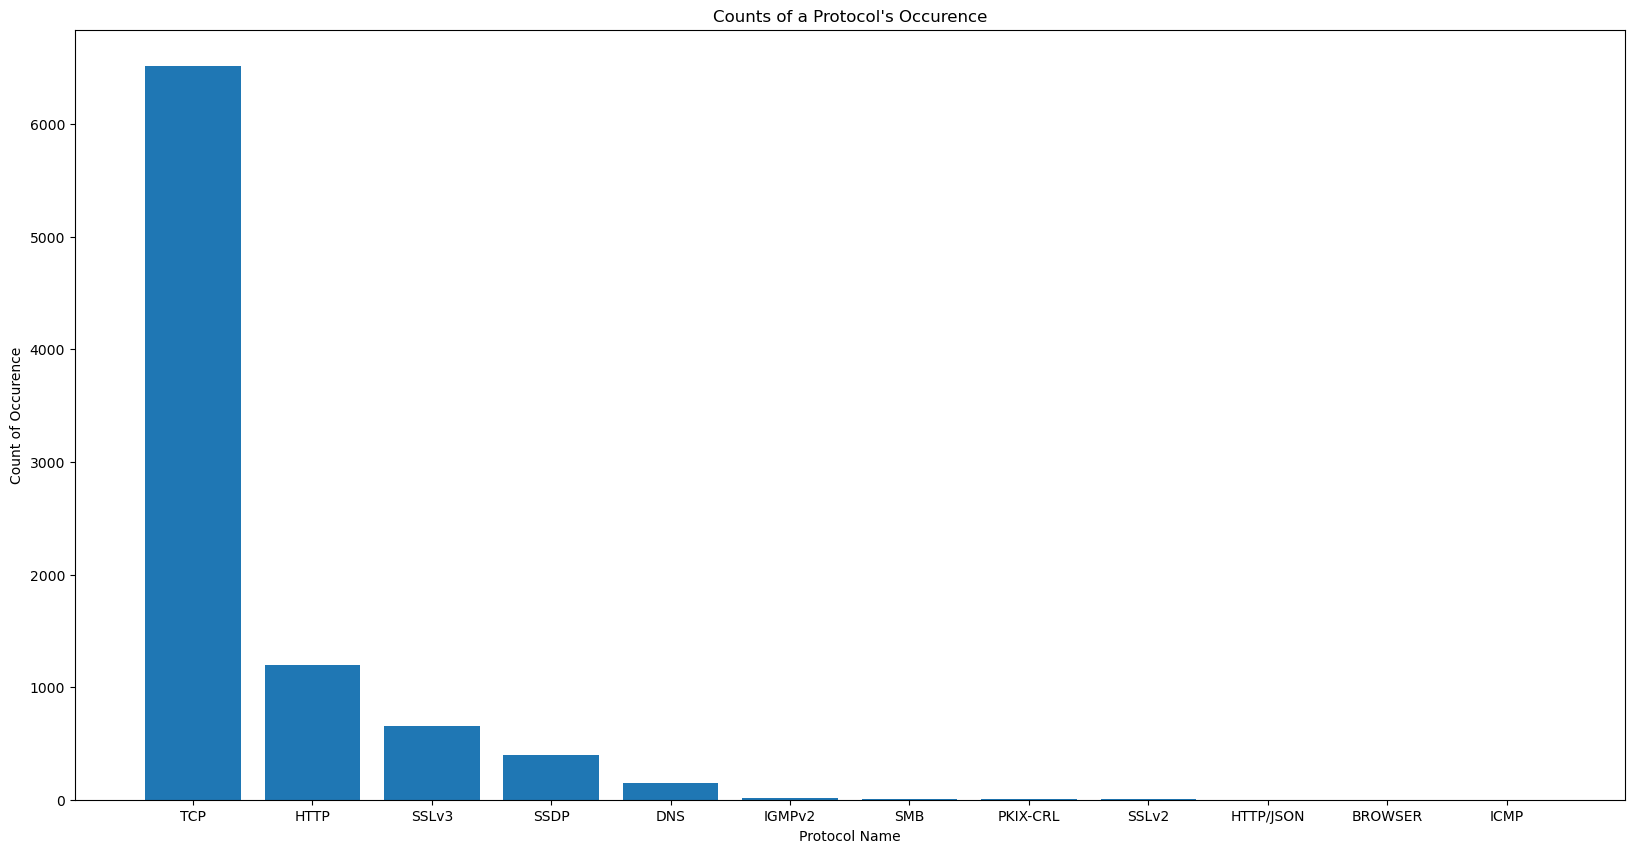

In [11]:
# ANSWER
######### ADD YOUR CODE HERE ##########
#Value counts gets unique values in protocol column and provides the total count of that value in a separate column
protocolCount = data["Protocol"].value_counts().reset_index()
plt.figure(figsize=(20,10))
#Protocol names on X, count of occurence of that protocol on Y
plt.bar(protocolCount["Protocol"], protocolCount["count"])
plt.title("Counts of a Protocol's Occurence")
plt.xlabel("Protocol Name")
plt.ylabel("Count of Occurence")
plt.show()

Fig 2. Bar chart displaying the overall occurence of the protocol a packet is related to in the data, ordered from most frequent to least.

### Question 3: Display a Scatter Chart that shows the association between Source and Destination data. 

#### (2 marks)
*Hint: Matplotlib has a scatterplot function that takes x and y as inputs*

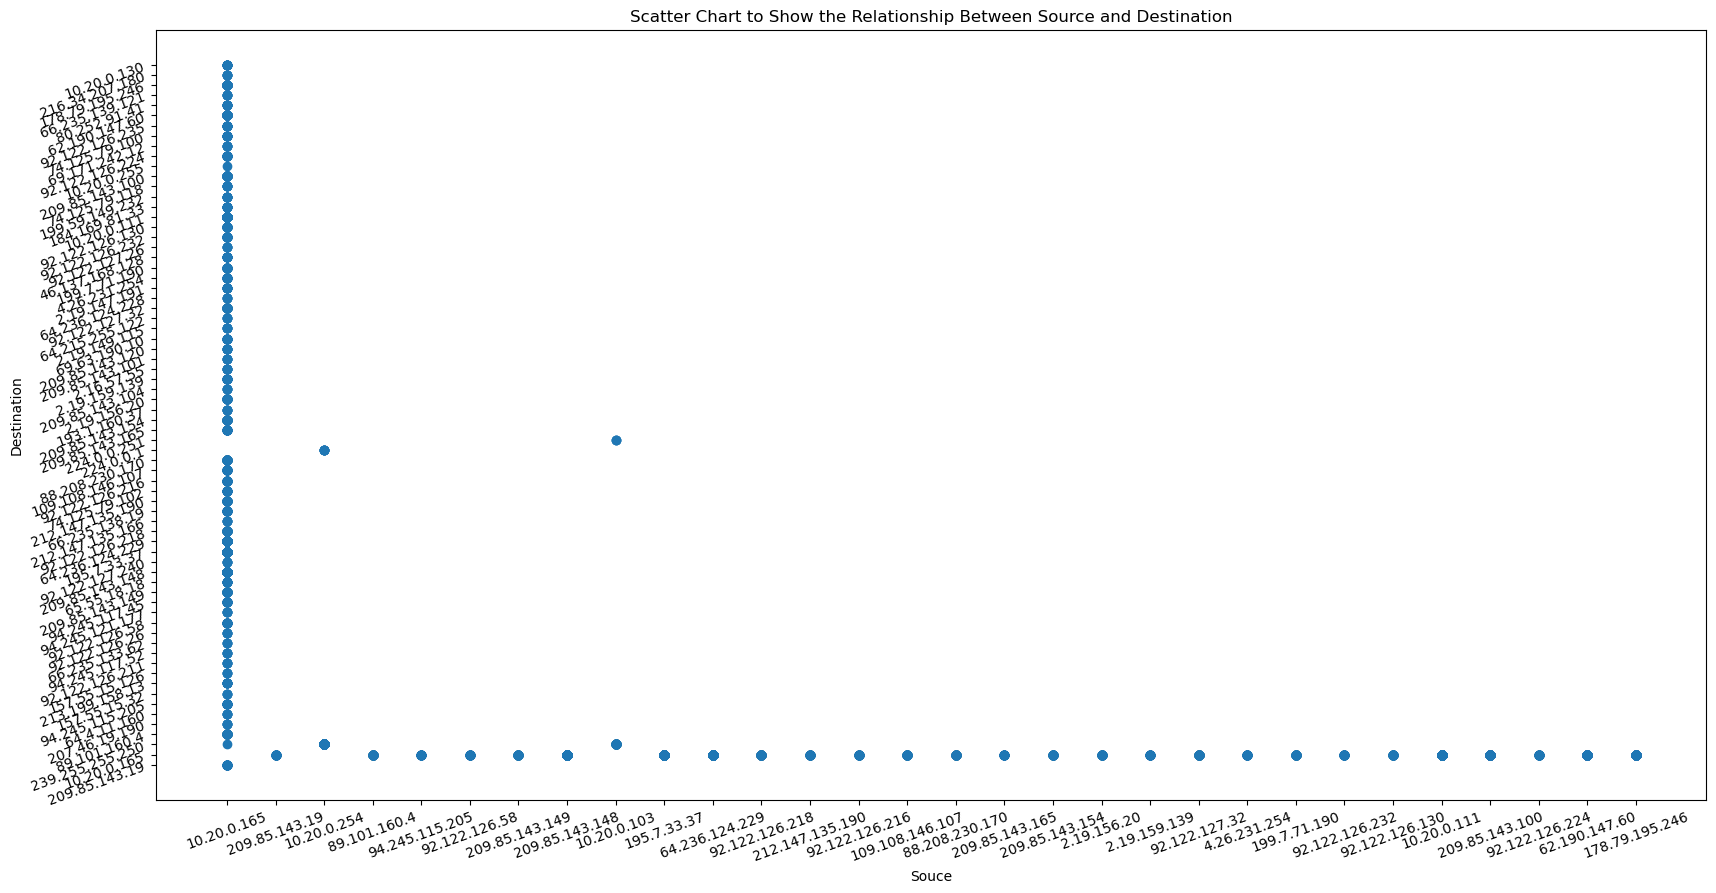

In [14]:
# ANSWER
plt.figure(figsize=(20,10))
plt.xticks(rotation=20)
plt.yticks(rotation=20)
######### ADD YOUR CODE HERE ##########
#Source on X destination on Y
plt.scatter(data["Source"], data["Destination"])
plt.title('Scatter Chart to Show the Relationship Between Source and Destination')
plt.xlabel('Souce')
plt.ylabel('Destination')
plt.show()

Fig 3. Scatterplot to display the relationship between source and destination of the recorded packets, each point representing a source and destination combination.

### Question 4: Display the data as a node link diagram using Source and Destination as your edges. 

#### (3 marks)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

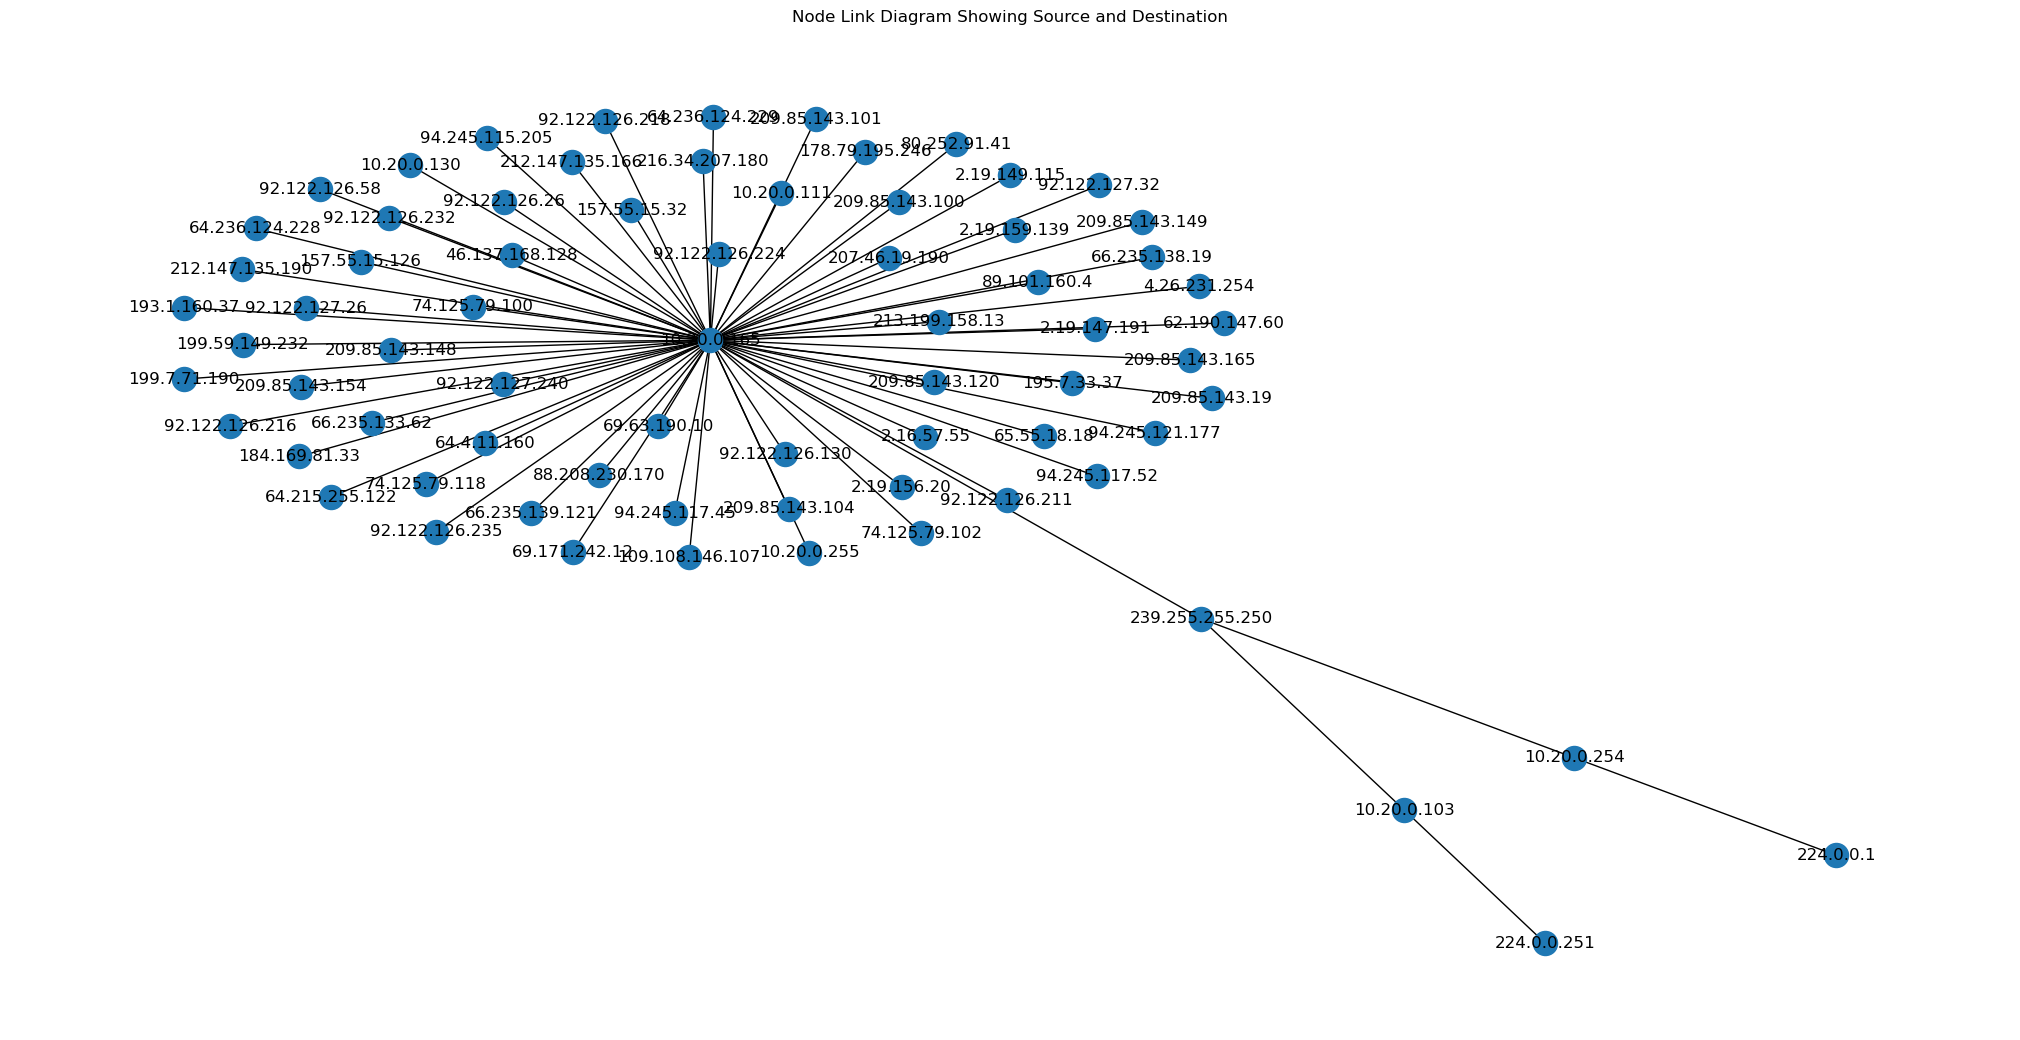

In [17]:
# ANSWER
######### ADD YOUR CODE HERE ##########
plt.figure(figsize=(20,10))
#Creating node link diagram using the data from the data frame
nodeLink = nx.from_pandas_edgelist(data, 'Source', 'Destination')
pos = nx.spring_layout(nodeLink)
nx.draw(nodeLink, pos, with_labels=True)
plt.title("Node Link Diagram Showing Source and Destination")
plt.show()

Fig 4. Node link diagram showing the communication flow of addresses in the network.

### Question 5: For each Protocol type, create a new Column and assign whether the Protocol usage is True or False 

#### (2 marks)
Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.

In [20]:
######### ADD YOUR CODE HERE ##########
#Get unique values of the protocol column into an array
protocolNames = data["Protocol"].unique()
#Sort alphabetically just for a better view on the data frame
protocolNames.sort()
#For each unique protocol add a column and set the value equal 
#to the True/False value of whether that protocol is the same 
#as the value in the pre-exisiting protocol column
for name in protocolNames:
    data[name] = data["Protocol"] == name
data

,Time,Source,Destination,Protocol,Length,Info,Seconds,BROWSER,DNS,HTTP,HTTP/JSON,ICMP,IGMPv2,PKIX-CRL,SMB,SSDP,SSLv2,SSLv3,TCP
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...,0.0,False,False,False,False,False,False,False,False,False,False,False,True
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L...",0.0,False,False,False,False,False,False,False,False,False,False,False,True
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0,0.0,False,False,False,False,False,False,False,False,False,False,False,True
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello,0.0,False,False,False,False,False,False,False,False,False,False,True,False
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0,0.0,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID...",833.0,False,False,False,False,False,False,False,True,False,False,False,False
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:",833.0,False,False,False,False,False,False,False,True,False,False,False,False
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra...",833.0,False,False,False,False,False,False,False,True,False,False,False,False
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA...",833.0,False,False,False,False,False,False,False,True,False,False,False,False


### Question 6: Show a Multi-Line Chart that shows the Total Number of Packets Per Protocol on the y-axis and "Seconds" on the x-axis. You should display a legend that states the colour of each protocol.

#### (6 marks)
*Hint: Think about how you did this in Question 1 , and recall that plt.plot can be used to append to an existing plot.*

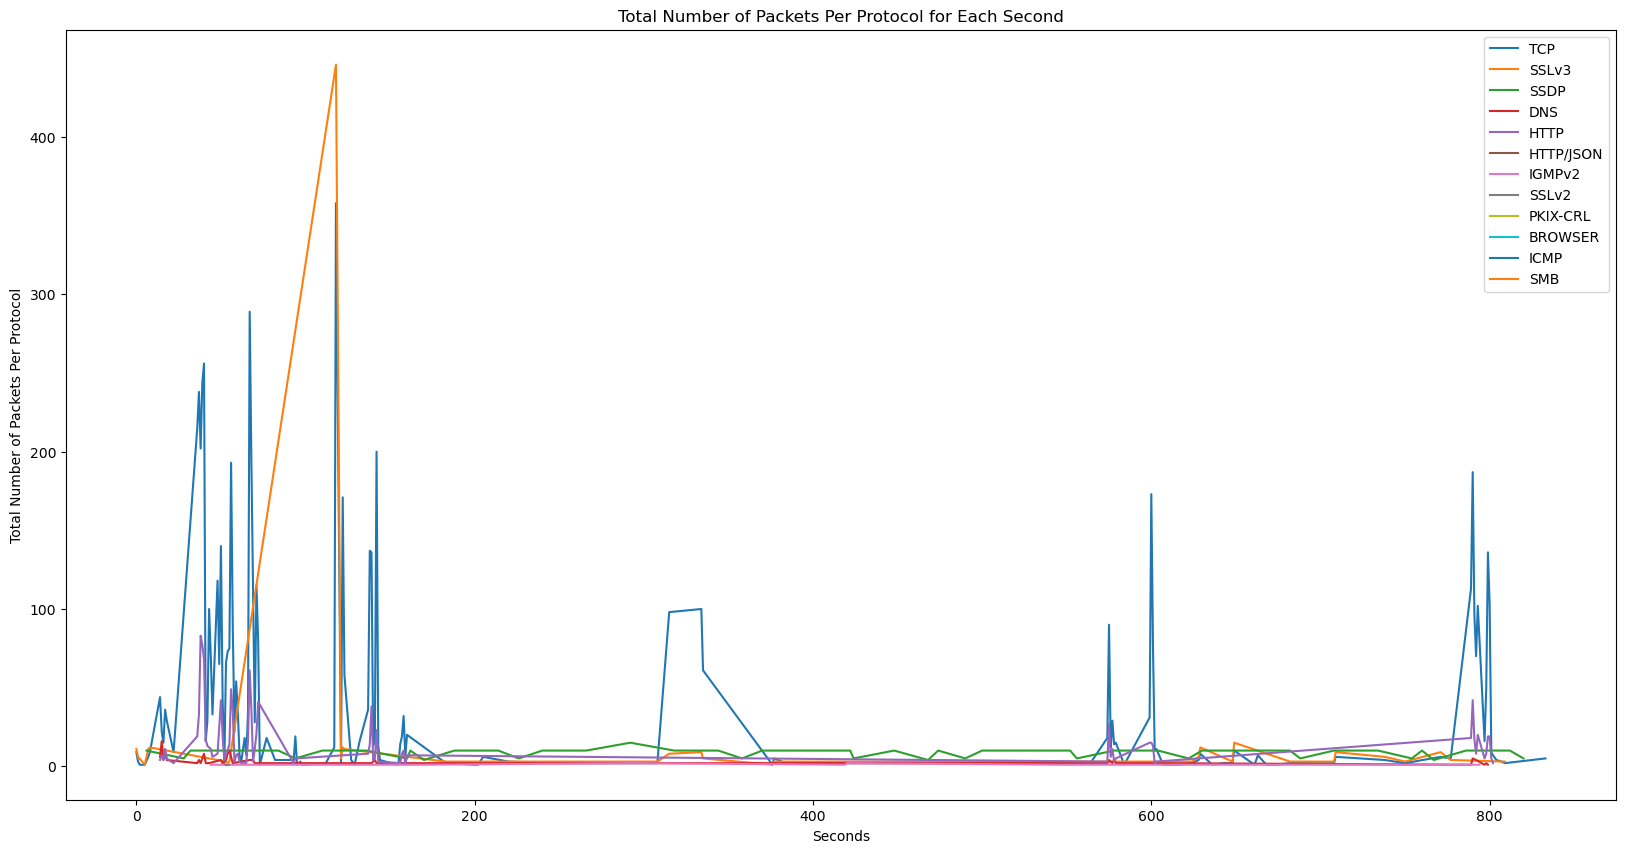

In [23]:
# ANSWER
######### ADD YOUR CODE HERE ##########
plt.figure(figsize=(20,10))
plt.title("Total Number of Packets Per Protocol for Each Second")
plt.xlabel("Seconds")
plt.ylabel("Total Number of Packets Per Protocol")

#Get data that has protcol, seconds, and the count of that protocol on that second
groupData = data.groupby(['Seconds', 'Protocol']).size().reset_index(name="Count on Second")

#For each unique value in the protocol column
for name in data["Protocol"].unique():
    #Filters the data so that only rows which are of the current protocol are used
    newData = groupData.loc[groupData["Protocol"] == name]
    #Plots the filtered data with the label being the protocol name
    plt.plot(newData["Seconds"], newData["Count on Second"], label=name)
#This ensures a legend is shown with the colours for each protocol›
plt.legend()
plt.show()

Fig 5. Multi-line chart showing the relationship between the frequency of network traffic/packets at each rounded down second, with each line representing the traffic for a specific protocol.

### Question 7: Describe what you believe are the key findings of each plot, including discussion of any stand-out features. Give justification for your answer in the context of a security scenario. Limit your response to a maximum of 200 words.

#### (6 marks)

1)
Irregular spikes (0-200 and 500-800 seconds) could indicate malicious activity, plausibly a DDoS attack due to the large amount of traffic that is anomalous compared to traffic between 200-500 seconds. This traffic can put a strain on performance and should be investigated.
***
2)
High TCP traffic is expected, however, spikes from plot 1 suggest a possible SYN flood DDoS attack <b>(Cloudflare, 2024)</b>. SSLv3 frequency is a concern, it was depreceated in 2015 shortly after a "serious vulnerability" was discovered <b>(Sectigo, 2023)</b>, its use is a likely security risk.
***
3)
Most addresses communicate with 10.20.0.165, suggesting a targeted DDoS attack, this could just be expected for the address of a service/server. The main security concern would be the exploitation of a single address affecting the majority of the network.
***
4)
Emphasises outliers connecting to 239.255.255.250, possibly indicating attempted external malicious connections due to their anomalous nature.
***
5)
The huge spike in SSLv3 indicates an attempts to exploit the depreceated protocol and steps to disable its future use would be recommended. Finally, the TCP spikes support previous suspicions of a SYN flood DDoS and should be investigated as a priority.

<h3>Bibliography</h3>
* SYN flood DDoS attack (2024) _Cloudflare_ Available from: https://www.cloudflare.com/en-gb/learning/ddos/syn-flood-ddos-attack/ [Accessed 25 October 2024]
* SSL Deprecation: Understanding the Evolution of Security Protocols (2023) _Sectigo_ Available from: https://www.sectigo.com/resource-library/ssl-deprecation-understanding-the-evolution-of-security-protocols [Accessed 25 October 2024]